<a href="https://colab.research.google.com/github/jin930303/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 구성하는 절차
##1. 더미데이터 준비
##2. 훈련용, 검증용, 테스트용으로 나눔
##3. 심층을 만듦(Dense)
##4. model에 적용
##5. compile 진행 (최적화 기법 적용 :adam)
##6. fit()
##7. evaluate()

In [31]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이
#            상세하게 출력되어 확인 할 수 있다. (에포크 횟수, 손실, 정확도)
# 아래쪽에 <keras.src.callbacks.history.History at 0x7fbfc87a39d0> 이 출력 메시지가 나옴
# 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행 결과를 자동으로 출력

# 다시 말해 fit() 메서드는 History 라는 클래스 객체를 반환 함   (훈련과정의 지표, 손실, 정확도 등이 들어있다.)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) =\
 keras.datasets.fashion_mnist.load_data()
# 엔터효과 제거용 \ -> 한줄로 긴 문장을 자름
train_scaled = train_input/255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [3]:
print(train_scaled.shape,train_target.shape)

(48000, 28, 28) (48000,)


In [4]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [5]:
print(val_scaled.shape,val_target.shape)

(12000, 28, 28) (12000,)


In [32]:
def model_fn(a_layer=None): # 모델을 만드는 간단한 함수를 정의함 (하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    #model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [33]:
model = model_fn()      # 위에서 만든 메서드 호출하여 모델에 담음
model.summary()         # 모델의 요약정보를 봄

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#                               다중분류                        정확도

In [35]:
# fit() 메서드 결과를 history 에 담아봄
history =model.fit(train_scaled,train_target,epochs=5,verbose=0)
# 훈련과정 출력을 조절함
# verbose=0 훈련과정을 나타내지 않음
# verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# verbose=2 진행막대 빼고 출력

In [36]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도accuracy, 손실 loss 값이 있다.

# 정확도 compile() 메서드의 metrics 매개변수에 accuracy를 추가했기 때문에
# history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


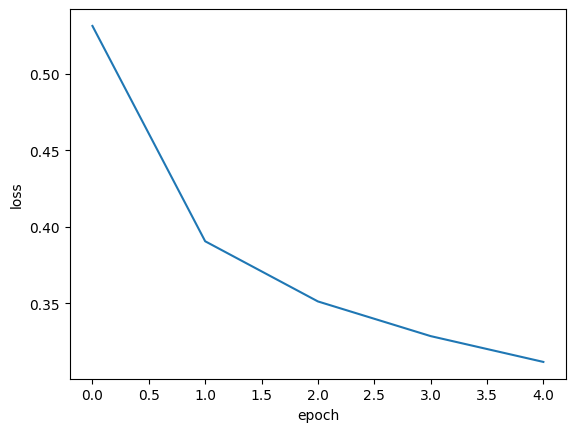

In [37]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정롹도는  에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플로립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# 파이썬 인덱스는 0 부터 시작함 5개의  에포크가 0~4 까지 x 축에 표현
plt.ylabel('loss')  # 손실된 값
plt.show()

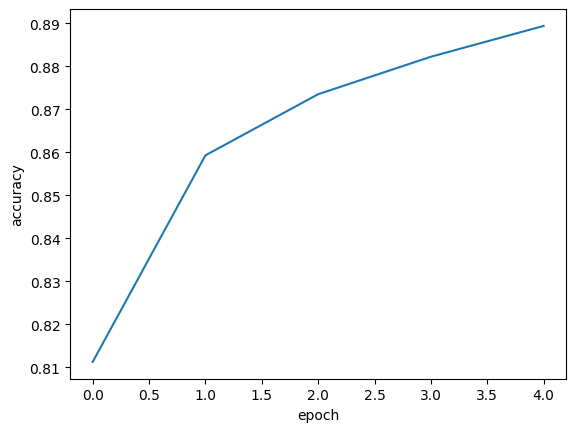

In [13]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상됨

In [16]:
# 이번에는 에포크 횟수를 20번으로 늘려보자

model = model_fn()  # 위에서 만든 메서드로 모델 생성(3개층 - 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=20,verbose=0)

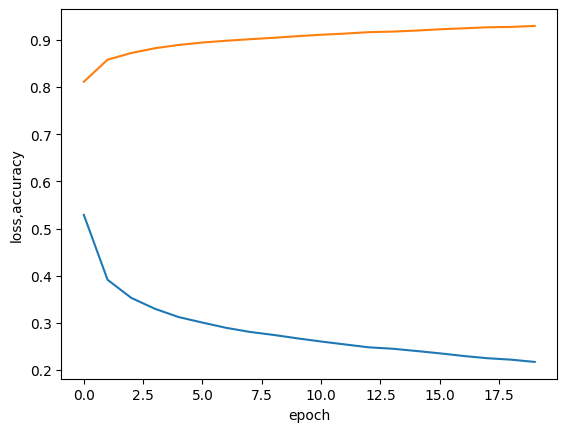

In [19]:
plt.plot(history.history['loss'])       # 손실률
plt.plot(history.history['accuracy'])   # 정확도
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.show()

In [ ]:
# 검증 손실
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.
# 인공 신경망은 모두 일종의 경사하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요함
# 그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다
# 검증 손실을 이용해서 과대 / 과소 적합을 응용하겠다.

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련 되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법임

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7629 - loss: 0.6758 - val_accuracy: 0.8443 - val_loss: 0.4393
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8501 - loss: 0.4109 - val_accuracy: 0.8524 - val_loss: 0.4046
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8671 - loss: 0.3618 - val_accuracy: 0.8605 - val_loss: 0.3840
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8788 - loss: 0.3354 - val_accuracy: 0.8633 - val_loss: 0.3750
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8873 - loss: 0.3162 - val_accuracy: 0.8667 - val_loss: 0.3764
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8926 - loss: 0.3039 - val_accuracy: 0.8727 - val_loss: 0.3678
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8976 - loss: 0.2902 - val_accuracy: 0.8684 - val_loss: 0.3912
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9020 - loss: 0.2803 - 

In [21]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy , 검증세트 손실 var_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


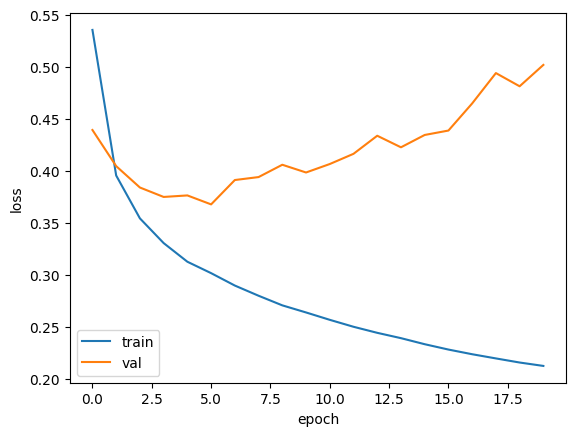

In [22]:
# 과대/ 과소 적합 문제를 조사하기 위해서 훈련손실, 검증손실을 한 그래프에 그려서 비교해보자

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯번째 에포크 만에 다시 상승함
# 훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어 짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 검증 세트에 대한 정확도가 증가할 거 같다.

# 과대적합을 막기 위한 방법으로 예전에 사용했던 규제방식 대신에
# 신경망에 특화된 규제방법(드롭아웃) 을 나중에 해보자

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


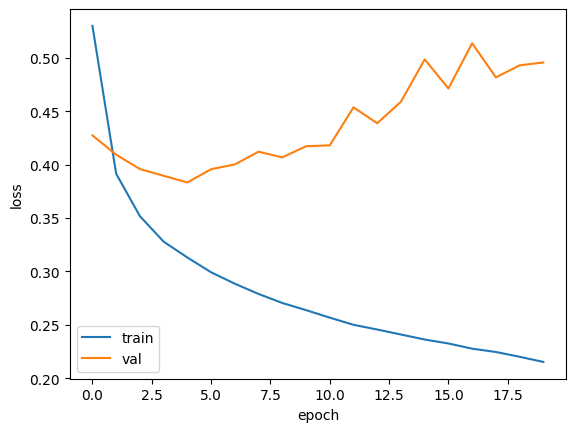

In [23]:
# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과대 적합을 완화시켜본다.
# RMSprop 옵티마이져는 많은 문제에서 잘 작동한다. -> 다른 방법으로는 adam 이 있다.
model = model_fn()
model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

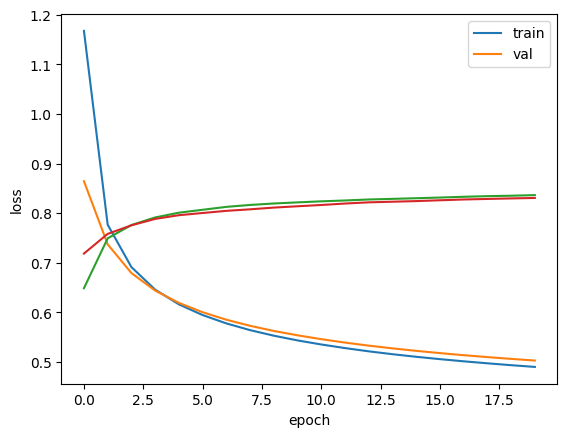

In [28]:
model = model_fn()
model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

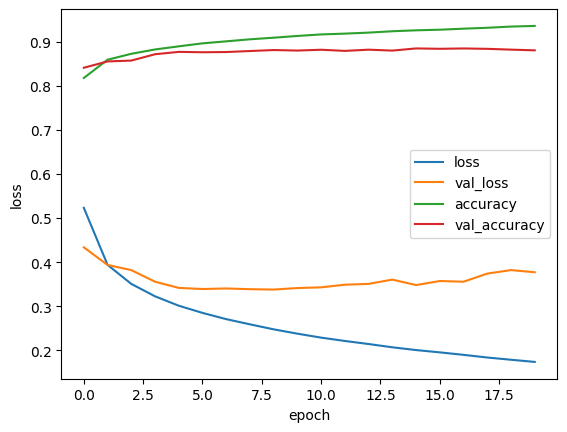

In [38]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

In [ ]:
# 드롭아웃 (Dropout) 은 딥러닝의 기초가 되는 제프리 힌턴이 소개
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0 으로 만듦) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴련이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 H1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것이다.

# 드롭아웃이 왜 과대적합을 막을 수 있을지 생각해 보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

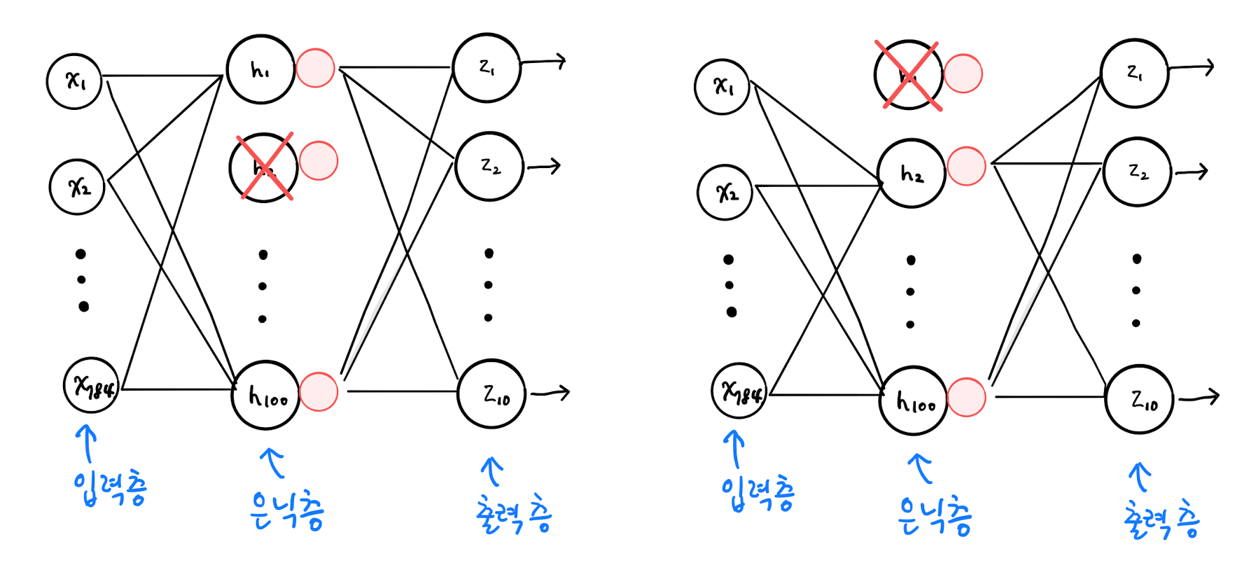

In [45]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는것 처럼 상상하게 됨
# 앙상블 : 더 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
# 과대 적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이층의 출력을 랜덤하게 0 으로 만듦
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭 아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭 아웃

model.summary() # 요약확인
# 은닉층 뒤에 추가된 드롭아웃 층 (3번째 값) 은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

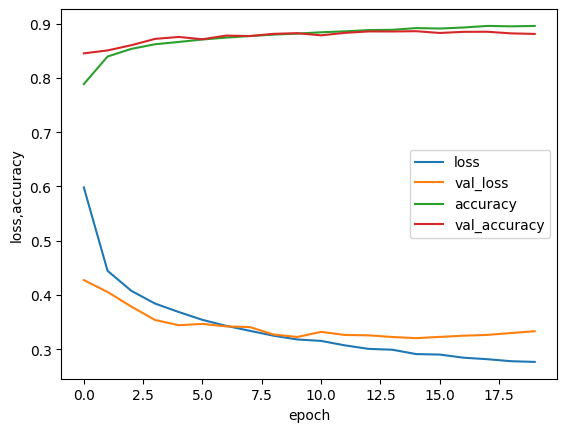

In [46]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련 손실과 검증 손실의 그래프를 그려보자.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()
# 과대 적합이 확실히 줄어 듦 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보자

In [47]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))
model.save('model-whole.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로우 체크포인트 포멧으로 저장하지만         https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함                   https://geunuk.tistory.com/466

model.save_weights('model.weights.h5')              #HDF5 형식으로도 저장됨 (폴더에서 확인)

In [48]:
# 이제는 저장한 모델을 불러와 테스트를 진행해보자

!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 10 05:51 model.weights.h5
-rw-r--r-- 1 root root 974768 Jan 10 05:51 model-whole.keras


In [50]:
# 실험1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5')  # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weights() 와 쌍을 이루는 load_weights() 메서드임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과
# 정확히 같은 구조를 가져야 한다.

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
import numpy as np

# predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개 이기 때문에
# predict() 메서드는 (12000, 10 ) 크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라 ( .argmax) 타겟 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled),axis=-1)

# axis=-1 배열의 마지막 차원에 따라 최대값을 고름
# 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5 * 3 배열에 axis = 1 로 한 값과 axis = 0 으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels) 와 타겟(val_target) 을 비교해서 같으면 1이 되고 다르면 0이 됨
# 이를 평균으로 출력해 본다( 정확도)
print(np.mean(val_labels == val_target))    # 88.10% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함
# 그 다음 라인은 argmax()로 고른 인덱스 (val_labels) 와 타겟 (val_target)을 바교
# -> 두 배열에서 각 위치의 값이 같다면 1, 다르면 0 (평균하면 정확도가 된다.)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8810833333333333


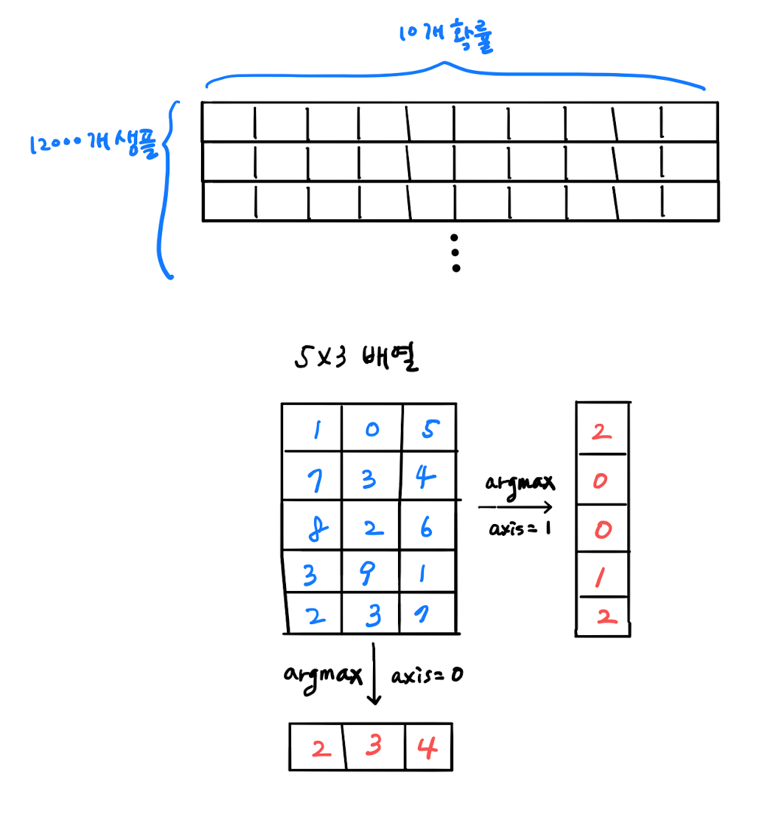

In [52]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole.keras')    # load_model() 저장된 케라스 파일 읽기

model.evaluate(val_scaled,val_target) # 같은 모델을 불러 들였기 때문에 위와 정획도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해 보자 -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.3296


[0.33326637744903564, 0.8810833096504211]

In [55]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용해보자.
# 추가적으로 콜백이라는 것을 활용해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스.콜백 패키지에 있다.
# fit() 메서드의 callback 매개 변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckPoint 콜백으로 에포크 마다 모델을 저장한다.
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0 , validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb])
# 모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨


In [56]:
model = keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled,val_target)
# keras.callbacks.ModelCheckPoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장했다.
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없다.
# 이때 훈련을 종료하면 자원과 시간을 아낄 수 있다. -> 조기종료(early stopping)
# 조기 종료는 딥러닝 분야에서 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제 방법중 하나

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8856 - loss: 0.3227


[0.32345861196517944, 0.8864166736602783]

In [59]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7302 - loss: 0.7654 - val_accuracy: 0.8398 - val_loss: 0.4391
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8360 - loss: 0.4574 - val_accuracy: 0.8555 - val_loss: 0.3906
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.4140 - val_accuracy: 0.8662 - val_loss: 0.3679
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.3904 - val_accuracy: 0.8667 - val_loss: 0.3629
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8640 - loss: 0.3682 - val_accuracy: 0.8710 - val_loss: 0.3473
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8668 - loss: 0.3555 - val_accuracy: 0.8741 - val_loss: 0.3389
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8731 - loss: 0.3431 - val_accuracy: 0.8770 - val_loss: 0.3398
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8758 - loss: 0.3376 - 

In [60]:
print(early_stopping_cb.stopped_epoch)      # 조기 종료 시점

15


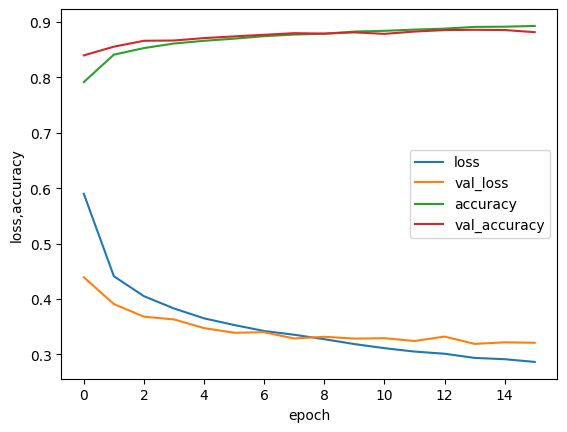

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8853 - loss: 0.3175


[0.3187028169631958, 0.8859999775886536]

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

model.evaluate(val_scaled, val_target)      # 검증세트의 성능 확인 (88.53%   /31.75%)